<a href="https://colab.research.google.com/github/ahmetbildirici/hu-bby261-2021-proje4/blob/main/Proje_4_Kilometer_to_miles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tahmin sayısı giriniz: 19
19 sayısı tahmin edilecek...
Tekrar sayısı giriniz: 400
Model 400 kere tekrar edilecek...
-34.0 kilometre = -21.12 mil
-20.0 kilometre = -12.42 mil
7.0 kilometre = -4.34 mil
5.0 kilometre = 3.1 mil
4.0 kilometre = 2.48 mil
17.0 kilometre = 10.56 mil
25.0 kilometre = 15.53 mil
40.0 kilometre = 24.85 mil
52.0 kilometre = 32.31 mil
70.0 kilometre = 43.49 mil
Model eğitimi sona erdi.
Grafik çıkartılıyor...
Doğru tahmin : 11.78
Modelin tahmini : [[10.9700775]]


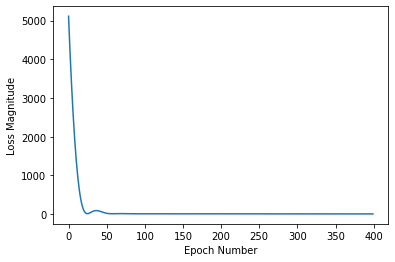

In [16]:
#
from numpy.core.arrayprint import IntegerFormat
import tensorflow as tf
import numpy as np
import logging
import matplotlib.pyplot as plt
import time
#
tahminSayi=int(input("Tahmin sayısını km cinsinden giriniz: "))
print(str(tahminSayi) + " sayısı tahmin edilecek...")
time.sleep(2)
tekrarSayi=int(input("Tekrar sayısı giriniz: "))
print("Model " + str(tekrarSayi) + " kere tekrar edilecek...")
time.sleep(2)

logger = tf.get_logger()
logger.setLevel(logging.ERROR)

km    = np.array([-34, -20, 7, 5, 4, 17, 25, 40, 52, 70],  dtype=float)
mil = np.array([-21.12, -12.42, -4.34, 3.10, 2.48, 10.56, 15.53, 24.85, 32.31, 43.49],  dtype=float)

for i,c in enumerate(km):
  print("{} kilometre = {} mil".format(c, mil[i]))

l0 = tf.keras.layers.Dense(units=1, input_shape=[1])

model = tf.keras.Sequential([l0])
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

history = model.fit(km, mil, epochs=tekrarSayi, verbose=False)

print("Model eğitimi sona erdi.")
print("Grafik çıkartılıyor...")
time.sleep(2)

plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

dogruTahmin = float(tahminSayi) * 0.62
print("Doğru sayı : " + str(dogruTahmin))
tahminSonuc = model.predict([tahminSayi])
print("Modelin tahmini : " + str(tahminSonuc))